In [3]:
from data import MNQ, MES, CL, GC, ZC, ZB

In [2]:
import warnings

warnings.filterwarnings("ignore")

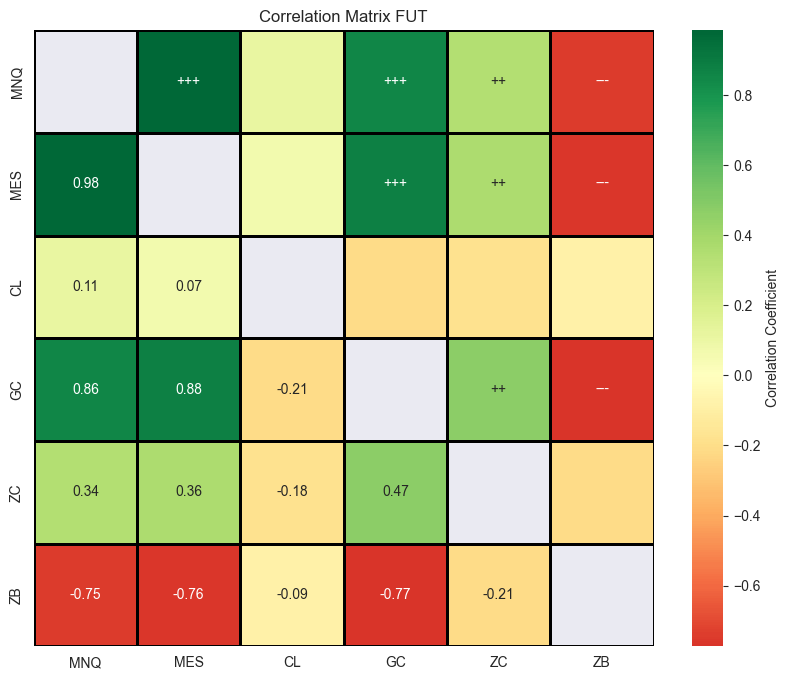

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

combined_df = pd.DataFrame({
    "MNQ": MNQ['Close'],
    "MES": MES['Close'],
    "CL": CL['Close'],
    "GC": GC['Close'],
    "ZC": ZC['Close'],
    "ZB": ZB['Close']
})

correlation_matrix = combined_df.corr()

def map_to_symbols(value):
    if value >= 0.5:
        return '+++'
    elif value >= 0.25:
        return '++'
    elif value >= -0.25:
        return ''
    elif value >= -0.5:
        return '--'
    else:
        return '---'

symbol_matrix = correlation_matrix.applymap(map_to_symbols)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=correlation_matrix,
    fmt=".2f",
    cmap='RdYlGn',
    center=0,
    linewidths=1,
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'}
)

mask_no_diag = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(
    correlation_matrix,
    mask=~mask_no_diag,
    annot=symbol_matrix,
    fmt='',
    cmap='RdYlGn',
    center=0,
    linewidths=1,
    linecolor='black',
    cbar=False
)

plt.title("Correlation Matrix FUT")
plt.show()
